## FFR120
# Felix Waldschock 2023

## Exercise 2.1 Two dimensional gas in a box  

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scienceplots
plt.style.use('science')

In [2]:
N = int(10e5)
kB = 1
T = 1
Eb = 2 * kB * T 


states = ["Left", "Middle", "Right"]

stateTrajectory = []
energyTrajectory = []

sum p_i:  1.0


<BarContainer object of 3 artists>

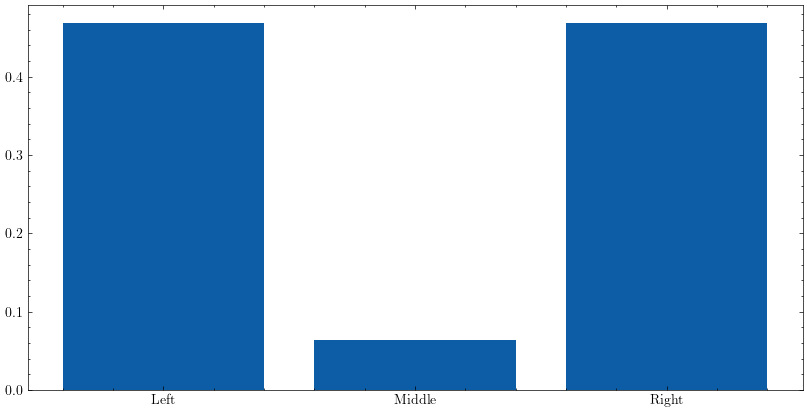

In [3]:
E0 = 0
E1 = Eb
E2 = 0

# compute Z
Z = 2 + np.exp(-Eb / (kB * T))  # 2.135

# compute the probability of changing state for each state
P0 = 1 / Z
P1 = np.exp(-Eb / (kB * T)) / Z
P2 = 1 / Z
print('sum p_i: ', P0 + P1 + P2)

# init state
state = "Left"
E = E0

energyTrajectory.append(E)
stateTrajectory.append(state)

# plot the probrability distribution
plt.figure(figsize=(10, 5))
plt.bar(states, [P0, P1, P2])


In [4]:

def changeProbability(state, E):
    r = np.random.random()
    
    # check in which state r lays
    cumSumP = np.cumsum([P0, P1, P2])
    if r < cumSumP[0]:
        new_state = "Left"
    elif r < cumSumP[1]:
        new_state = "Middle"
    else:
        new_state = "Right"
    
    # check if transition is allowed
    if state == "Left" and new_state == "Middle":
        state = "Middle"
        E = E1
    elif state == "Middle" and new_state == "Left":
        state = "Left"
        E = E0
    elif state == "Middle" and new_state == "Right":
        state = "Right"
        E = E2
    elif state == "Right" and new_state == "Middle":
        state = "Middle"
        E = E1
    else:
        state = state
        E = E

    
    return state, E      

Number of 1s:  63262


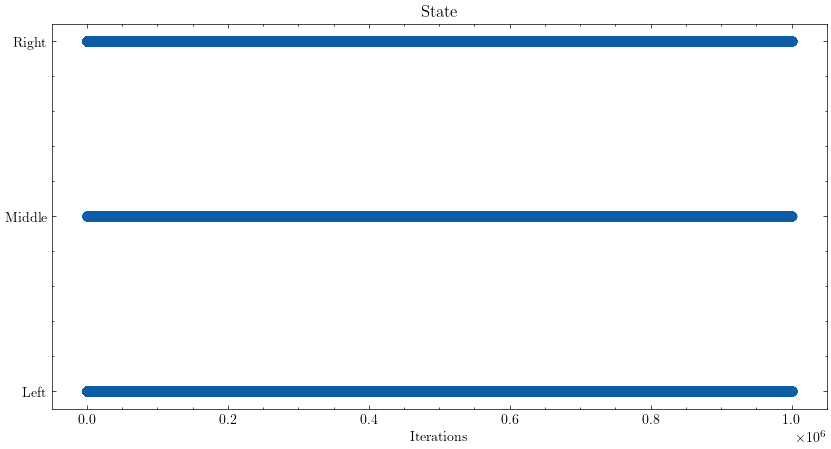

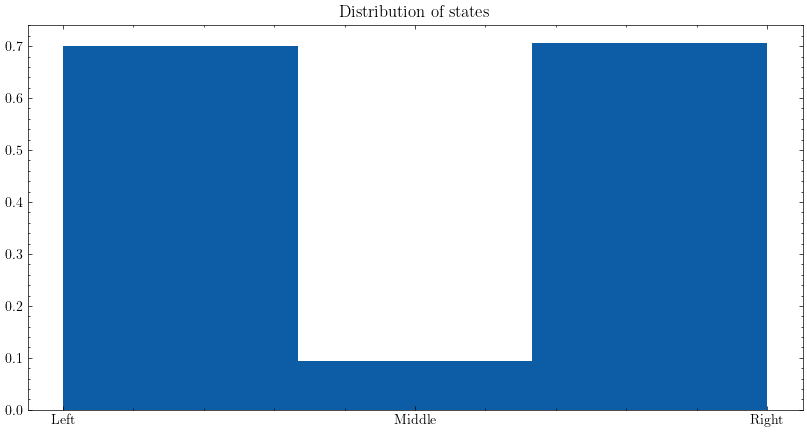

In [5]:

for i in range(N):
    state, E = changeProbability(state, E)
    energyTrajectory.append(E)
    stateTrajectory.append(state)
        
# convert to numpy array
stateTrajectory = np.array(stateTrajectory)

stateTrajectory_Numbers = stateTrajectory.copy()
# convert to numbers
stateTrajectory_Numbers[stateTrajectory_Numbers == "Left"] = 0
stateTrajectory_Numbers[stateTrajectory_Numbers == "Middle"] = 1
stateTrajectory_Numbers[stateTrajectory_Numbers == "Right"] = 2
stateTrajectory_Numbers = stateTrajectory_Numbers.astype(int)

# plot the trajectory
plt.figure(figsize=(10, 5))
plt.plot(stateTrajectory, 'o')
plt.title("State")
plt.xlabel('Iterations')

# plot the histogram
plt.figure(figsize=(10, 5))
plt.title("Distribution of states")
plt.hist(stateTrajectory, bins=3, density=True)

# how many 1s are in the array
print("Number of 1s: ", np.sum(stateTrajectory_Numbers == 1))

<BarContainer object of 3 artists>

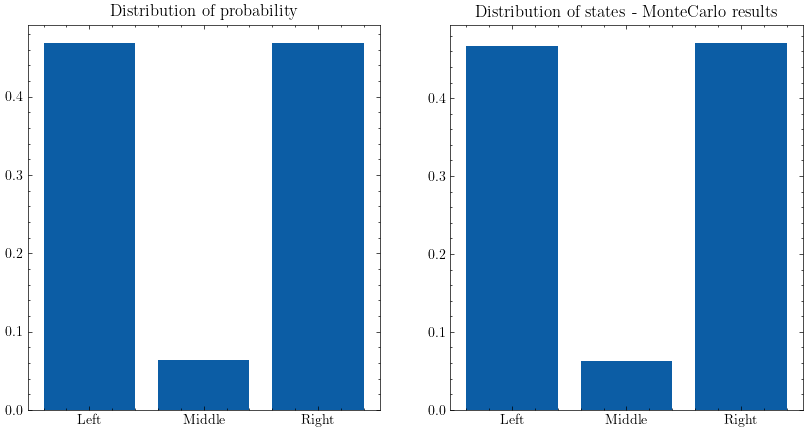

In [6]:
# overlay the probability histogram with the distribution of states histogram
# subplot
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)


# sum how often Left / Middle / Right occured
sumLeft = np.sum(stateTrajectory_Numbers == 0)
sumMiddle = np.sum(stateTrajectory_Numbers == 1)
sumRight = np.sum(stateTrajectory_Numbers == 2)
sum = np.array([sumLeft, sumMiddle, sumRight]) / N
plt.title("Distribution of probability")
plt.bar(states, [P0, P1, P2], label="Probability distribution")
plt.subplot(1, 2, 2)
plt.title("Distribution of states - MonteCarlo results")
plt.bar(states, sum, label="Distribution of states")


Text(0.5, 0, 'Iterations')

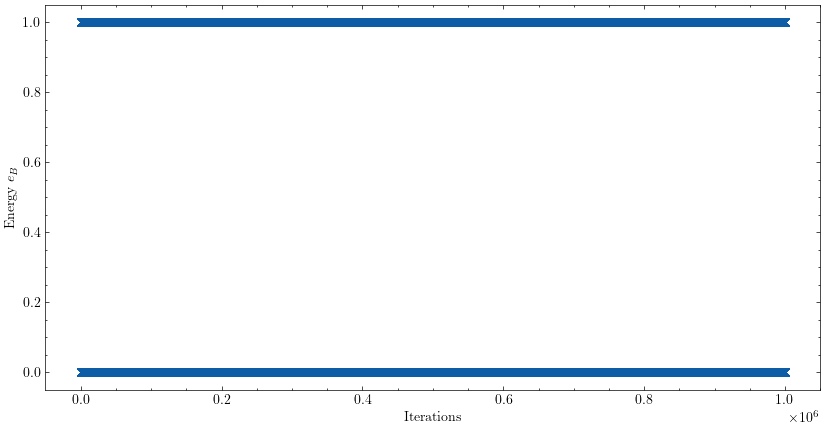

In [7]:
# plot energy 
plt.figure(figsize=(10, 5))
plt.plot(np.array(energyTrajectory)/Eb, 'x')
plt.ylabel('Energy $e_B$')
plt.xlabel('Iterations')

In [8]:
# after how many iterations is the equilibrium reached, do this with the probability which should P0,P1,P2
# these should be reached by a tolerance

errorCases = []

def findTimeOfEquilibrium(stateTrajectory, P0, P1, P2):
    LeftCounter = 0
    MiddleCounter = 0
    RightCounter = 0
    LeftProbability = 0
    MiddleProbability = 0
    RightProbability = 0
    tolerance = 0.04

    for i in range(len(stateTrajectory)):
        if stateTrajectory[i] == "Left":
            LeftCounter += 1
        elif stateTrajectory[i] == "Middle":
            MiddleCounter += 1
        elif stateTrajectory[i] == "Right":
            RightCounter += 1

        sumC = LeftCounter + MiddleCounter + RightCounter

        LeftProbability = LeftCounter / sumC
        MiddleProbability = MiddleCounter / sumC
        RightProbability = RightCounter / sumC

        deltaLeftProbability = np.abs(LeftProbability - P0)
        deltaMiddleProbability = np.abs(MiddleProbability - P1)
        deltaRightProbability = np.abs(RightProbability - P2)

        if deltaLeftProbability < tolerance and deltaMiddleProbability < tolerance and deltaRightProbability < tolerance:
            return i, True
            break
    # error
    print("Equilibrium not reached")
    return np.inf, False

# test the function
testArray = np.array(["Left","Left","Middle","Left","Right", "Right", "Right"])
print(findTimeOfEquilibrium(stateTrajectory, P0, P1, P2))

(489, True)


# Transition frequency

In [9]:
def calculateChangingFrequency(stateTrajectory):
    # start at the beginning of the array and check how many itertions it takes until the state is RIGHT
    # then check how many iterations it takes until the state is LEFT again

    # loop over array
    lengthOfStayInState = []
    counter = 0
    currentState = stateTrajectory[0]

    for i in range(len(stateTrajectory)):
        
        if currentState == "Left":
            if stateTrajectory[i] == "Right":
                lengthOfStayInState.append(counter)
                counter = 0
                currentState = "Right"
        elif currentState == "Right":
            if stateTrajectory[i] == "Left":
                lengthOfStayInState.append(counter)
                counter = 0
                currentState = "Left"
        counter += 1

        if i == len(stateTrajectory)-1:
            lengthOfStayInState.append(counter)


    return lengthOfStayInState, np.mean(np.array(lengthOfStayInState))
        
# testArray = np.array(["Left","Left","Middle","Left","Right", "Right", "Left","Left", "Right"])
# print(len(testArray))
# length, mean = calculateChangingFrequency(testArray)

# print(length)
# print(mean)


In [10]:
# vary eB and determine how it affects the frequency of changes

# array from 0 to 7 with 0.5 steps
eB_ = np.linspace(0.5, 9, 18)

#eB_ = np.array([0,0.5,1, 1.5,2 ,3,4,5,6,7])
M = len(eB_)    # number of different values of eB
N = 100000     # number of iterations

frequencyTrajectory = np.zeros(M)
StepsUntilEquilibrium = np.zeros(M)

# fix random seed
#np.random.seed(230)

if (1):
    for j in range(M):
        Eb = eB_[j]
        E0 = 0
        E1 = Eb
        E2 = 0

        # compute Z
        Z = 2 + np.exp(-Eb / (kB * T))  # inititally 2.135

        # compute the probability of changing state for each state
        P0 = 1 / Z
        P1 = np.exp(-Eb / (kB * T)) / Z
        P2 = 1 / Z

        # init new particle
        state = "Left"
        E = E0
        stateTrajectory = []
        energyTrajectory = []
        stateTrajectory.append(state)
        energyTrajectory.append(E)
        for i in range(N):
            state, E = changeProbability(state, E)
            stateTrajectory.append(state)
            energyTrajectory.append(E)
        # convert to numpy array
        stateTrajectory = np.array(stateTrajectory)
        # calculate the frequency
        lengthOfStayInState, mean = calculateChangingFrequency(stateTrajectory)
        frequencyTrajectory[j] = 1 / mean
        # calculate the time until equilibrium
        equilibrium, equilibriumState = findTimeOfEquilibrium(stateTrajectory, P0, P1, P2)
        # catch the errors of finding the equilibrium
        if equilibrium == False:
            errorCases.append([stateTrajectory, Eb])
        else:
            StepsUntilEquilibrium[j] = equilibrium
        
np.save("frequencyTrajectory.npy", frequencyTrajectory)
np.save("StepsUntilEquilibrium.npy", StepsUntilEquilibrium)      

Equilibrium not reached


Text(0, 0.5, 'Steps until equilibrium')

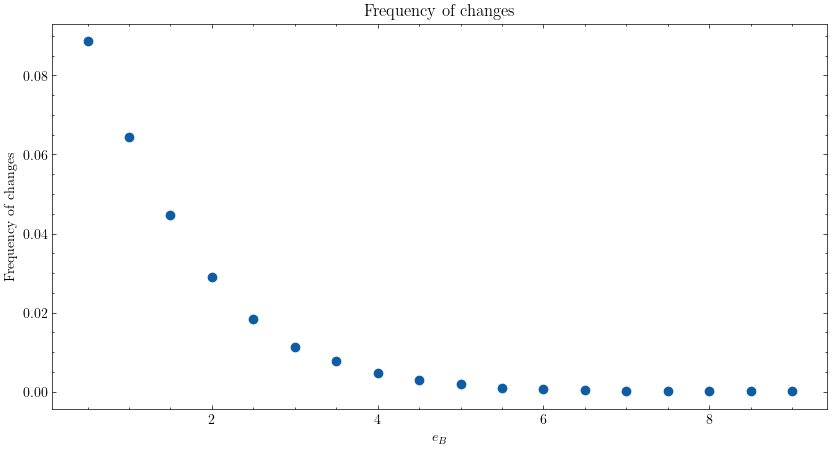

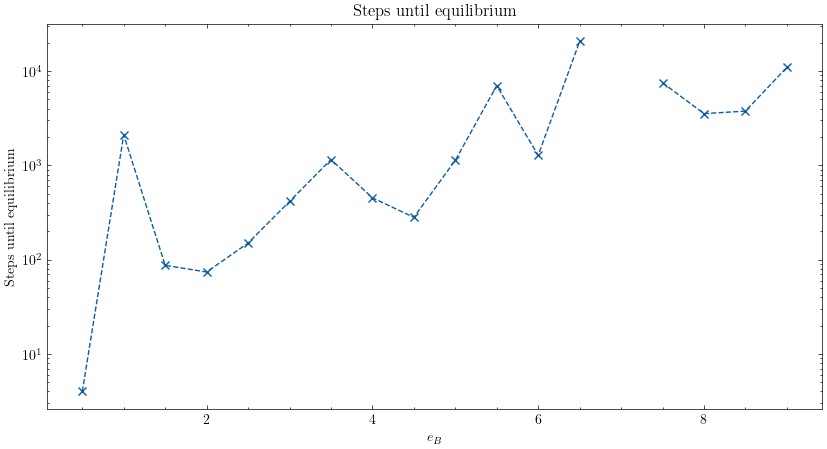

In [11]:
# load the arrays
frequencyTrajectory = np.load("frequencyTrajectory.npy")
StepsUntilEquilibrium = np.load("StepsUntilEquilibrium.npy")

plt.figure(figsize=(10, 5))
plt.plot(eB_, frequencyTrajectory, 'o')
plt.title("Frequency of changes")
plt.xlabel(r"$e_B$")
plt.ylabel("Frequency of changes")

plt.figure(figsize=(10, 5))
plt.semilogy(eB_, StepsUntilEquilibrium, '--x')
plt.title("Steps until equilibrium")
plt.xlabel(r"$e_B$")
plt.ylabel("Steps until equilibrium")

When looking at the trajectories of the run that did not find equilibrium, one sees, that the particle is not able to jump out of one state, simply since the energy barrier is to high. The higher the barrier the more clearly it is to observe

In [12]:
# print the histogram of all error cases each one in a subplot
if(len(errorCases) > 0):
    print(errorCases[0][0])
    for i in range(len(errorCases)):
        plt.figure(figsize=(10, 5))
        plt.hist(errorCases[i][0], bins=3, density=True)
        plt.title("Histogram with energy: {}".format(errorCases[i][1]))
        plt.show



# Escape time

In [13]:
def findEscapeTime(statetrajectory):
    for i in range(len(statetrajectory)):
        if statetrajectory[i] == "Right":
            return i
            break

In [14]:
eB_ = np.linspace(0.5, 9, 18)
T_ = np.array([1, 2.269, 5])
experimentSize = 20
N = 50000

# init the array to store the escape times
escapeTimes = np.zeros((len(eB_), len(T_)))

# fix random seed
np.random.seed(240)

for e in range(experimentSize):
    localEscapeTimes = np.zeros((len(eB_), len(T_)))
    for i in range(len(eB_)):
        for j in range(len(T_)):
            # set the parameters
            Eb = eB_[i]
            T = T_[j]
            beta = 1 / T
            
            
            E0 = 0
            E1 = Eb
            E2 = 0

            # compute Z
            Z = 2 + np.exp(-Eb / (kB * T))  # inititally 2.135

            # compute the probability of changing state for each state
            P0 = 1 / Z
            P1 = np.exp(-Eb / (kB * T)) / Z
            P2 = 1 / Z

            # init new particle
            state = "Left"
            E = E0
            stateTrajectory = []
            energyTrajectory = []
            stateTrajectory.append(state)
            energyTrajectory.append(E)
            for _ in range(N):
                state, E = changeProbability(state, E)
                stateTrajectory.append(state)
                energyTrajectory.append(E)

            localEscapeTimes[i,j] = findEscapeTime(stateTrajectory)
    # average over the escape times
    escapeTimes += localEscapeTimes

# average over the escape times
escapeTimes /= experimentSize



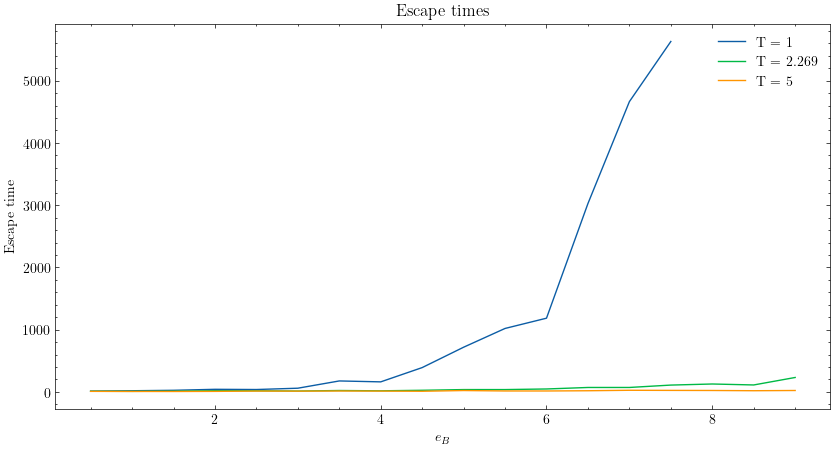

In [15]:
# plot the escape times
plt.figure(figsize=(10, 5))
plt.plot(eB_, escapeTimes[:,0], label="T = 1")
plt.plot(eB_, escapeTimes[:,1], label="T = 2.269")
plt.plot(eB_, escapeTimes[:,2], label="T = 5")
plt.title("Escape times")
plt.xlabel(r"$e_B$")
plt.ylabel("Escape time")
plt.legend()